In [42]:
import pandas  as pd
from matplotlib import pyplot as plt

,행정구역,2020년06월_총인구수,2020년06월_세대수,2020년06월_세대당 인구,2020년06월_남자 인구수,2020년06월_여자 인구수,2020년06월_남여 비율,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,서울특별시 (1100000000),"9,720,846","4,384,076",2.22,"4,732,275","4,988,571",0.95,NaN,NaN,NaN,NaN,NaN,NaN
1,서울특별시 종로구 (1111000000),"150,383","74,497",2.02,"73,288","77,095",0.95,NaN,NaN,NaN,NaN,NaN,NaN
2,서울특별시 종로구 청운효자동(1111051500),"12,609","5,395",2.34,"5,885","6,724",0.88,NaN,NaN,NaN,NaN,NaN,NaN


##### 1. 주민등록인구및세대현황.csv 가지고 와서 데이터 프레임으로 작성합니다.

In [46]:
df=pd.read_csv('주민등록인구및세대현황.csv',encoding="cp949")  #cp949

In [47]:
df.head(3)

,행정구역,2020년06월_총인구수,2020년06월_세대수,2020년06월_세대당 인구,2020년06월_남자 인구수,2020년06월_여자 인구수,2020년06월_남여 비율
0,서울특별시 (1100000000),"9,720,846","4,384,076",2.22,"4,732,275","4,988,571",0.95
1,서울특별시 종로구 (1111000000),"150,383","74,497",2.02,"73,288","77,095",0.95
2,서울특별시 종로구 청운효자동(1111051500),"12,609","5,395",2.34,"5,885","6,724",0.88


##### 2. 인구정보 데이터 프레임의 컬럼명을 행정구역, 총인구수, 세대수, 세대당인구, 남자, 여자, 남녀비율 로 변경하세요

In [48]:
df.columns=["행정구역","총인구수","세대수","세대당인구","남자","여자","남녀비율"]

In [49]:
df.head(3)

,행정구역,총인구수,세대수,세대당인구,남자,여자,남녀비율
0,서울특별시 (1100000000),"9,720,846","4,384,076",2.22,"4,732,275","4,988,571",0.95
1,서울특별시 종로구 (1111000000),"150,383","74,497",2.02,"73,288","77,095",0.95
2,서울특별시 종로구 청운효자동(1111051500),"12,609","5,395",2.34,"5,885","6,724",0.88


##### 3. 남녀비율 컬럼을 제거합니다.

In [50]:
df = df.drop('남녀비율',axis=1)

In [51]:
df.head(3)

,행정구역,총인구수,세대수,세대당인구,남자,여자
0,서울특별시 (1100000000),"9,720,846","4,384,076",2.22,"4,732,275","4,988,571"
1,서울특별시 종로구 (1111000000),"150,383","74,497",2.02,"73,288","77,095"
2,서울특별시 종로구 청운효자동(1111051500),"12,609","5,395",2.34,"5,885","6,724"


##### 4. 행정구역 컬럼의 ‘(’ ‘)’를 제거하고 시,구,동 컬럼을 만들어 분리해 넣고 대구지역의 값만 가지고 와서 인덱스를 새로 부여합니다.

In [52]:
df['시'] = df['행정구역'].str.split(' ').str[0]
df['구'] = df['행정구역'].str.split(' ').str[1]
df['동'] = df['행정구역'].str.split(' ').str[2].str.split('(').str[0]


In [54]:
def replaceNA(v):
    import numpy as np
    if v:
        return v
    return np.NAN 

In [56]:
df['동'] = df['동'].apply(replaceNA)


In [57]:
df = df[df['시'] == '대구광역시']


In [58]:
df=df.dropna(subset=['동'])


In [59]:
df = df.reset_index(drop=True)

In [61]:
df.head(3)

,행정구역,총인구수,세대수,세대당인구,남자,여자,시,구,동
0,대구광역시 중구 동인동(2711051700),"8,755","5,183",1.69,"4,341","4,414",대구광역시,중구,동인동
1,대구광역시 중구 삼덕동(2711054500),"6,733","4,018",1.68,"3,186","3,547",대구광역시,중구,삼덕동
2,대구광역시 중구 성내1동(2711056500),"5,033","3,349",1.50,"2,394","2,639",대구광역시,중구,성내1동


##### 5. 총인구수, 남자, 여자 컬럼의 데이타 타입을 정수형으로 변경합니다.

In [62]:
df['총인구수'] = df['총인구수'].str.replace(',', '').astype('int64')
df['남자'] = df['남자'].str.replace(',', '').astype('int64')
df['여자'] = df['여자'].str.replace(',', '').astype('int64')


##### 6. 동별로 대구 인구를 차트로 표시합니다.

In [63]:
plt.rcParams['font.family'] = 'NanumBarunGothic' 

In [65]:
temp_df = df.groupby(df["구"]).sum()


In [66]:
temp_df.head(3)


,총인구수,세대당인구,남자,여자
구,,,,
남구,147482,25.21,70945,76537
달서구,565378,51.33,279227,286151
달성군,257154,25.03,130641,126513


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45224 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 45804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages

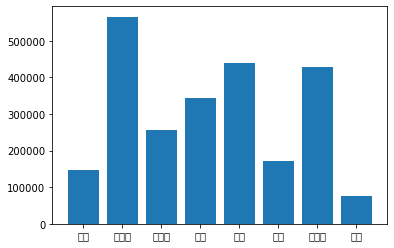

In [67]:
plt.bar(temp_df.index, temp_df['총인구수'])
plt.show()


##### 7. 동별 남,여 인구를 차트로 표시합니다.

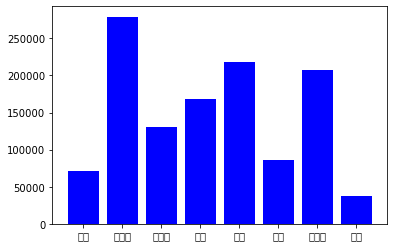

In [68]:
plt.bar(temp_df.index, temp_df['남자'], color='b', label='male')
plt.show()

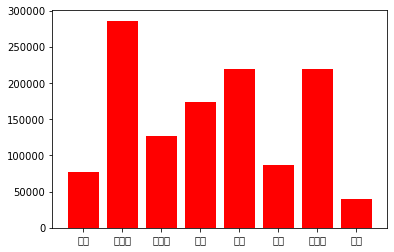

In [69]:
plt.bar(temp_df.index, temp_df['여자'], color='r', label='female')
plt.show()


##### 8. Choropleth, geojson 등을 이용하여 동별 인구수를 색상별로 지도에 나타내시오

In [73]:
## pip install folium        << Anaconda Prompt 에서 실행 

import folium,json

map_osm = folium.Map(location=[35.848987,128.72818],zoom_start=10)
with open('daegu.json') as json_file:
    json_data = json.load(json_file)
    folium.Choropleth(geo_data=json_data,
                      data=temp_df['총인구수'],
                      columns=[temp_df.index,temp_df['총인구수']],
                      key_on='feature.properties.name',
                      fill_color="YlGnBu"
).add_to(map_osm)
map_osm